In [36]:
import pandas as pd
import numpy as np

In [429]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from datetime import date
today = date.today()

In [87]:
#read in the data file
df = pd.read_csv('../data/mega_millions_winning_numbers.csv', parse_dates=['Draw Date'])

In [92]:
df.tail()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,first,second,third,fourth,fifth
1849,2020-03-17,20 27 28 58 59,25,3.0,20,27,28,58,59
1850,2020-03-20,34 35 41 45 54,5,4.0,34,35,41,45,54
1851,2020-03-24,02 08 16 18 31,14,2.0,02,08,16,18,31
1852,2020-03-27,03 25 28 50 60,1,4.0,03,25,28,50,60
1853,2020-03-31,08 17 51 57 70,2,4.0,08,17,51,57,70


In [93]:
#split the winning numbers column, into multiple columns
df[['first','second','third', 'fourth', 'fifth']] = df.loc[:,'Winning Numbers'].apply( 
   lambda x: pd.Series(str(x).split(" "))) 

In [94]:
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,first,second,third,fourth,fifth
0,2002-05-17,15 18 25 33 47,30,NaN,15,18,25,33,47
1,2002-05-21,04 28 39 41 44,9,NaN,04,28,39,41,44
2,2002-05-24,02 04 32 44 52,36,NaN,02,04,32,44,52
3,2002-05-28,06 21 22 29 32,24,NaN,06,21,22,29,32
4,2002-05-31,12 28 45 46 52,47,NaN,12,28,45,46,52


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 9 columns):
Draw Date          1854 non-null datetime64[ns]
Winning Numbers    1854 non-null object
Mega Ball          1854 non-null int64
Multiplier         951 non-null float64
first              1854 non-null object
second             1854 non-null object
third              1854 non-null object
fourth             1854 non-null object
fifth              1854 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 130.5+ KB


## There have been 1,854 drawings since May 17, 2002 to March 31, 2020

In [96]:
#concat all columns into one to get unique numbers
nums = pd.concat([df['first'], df['second'], df['third'], df['fourth'], df['fifth']], axis=0)

In [97]:
#all unique numbers
np.unique(sorted(nums))

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75'], dtype='<U2')

### As you can see from the array above, we have numbers up to 75, something that as of the date of the analysis is not allowed any more.  MegaMillions has changed to only 70 numbers as of Oct. 28, 2017

<TABLE>
   <TR>    
       <TH>Starting Date</TH>
       <TH>Pick 5 White Balls From Field of</TH>
       <TH>Pick 1 Gold (Mega) Ball From Field of</TH>
       <TH>Jackpot odds</TH>
   </TR>
   <TR>
      <TD>September 6, 1996</TD>
      <TD>50</TD>
      <TD>25</TD>
      <TD>1: 52,969,000</TD>
   </TR>
   <TR>
      <TD>January 13, 1999</TD>
      <TD>50</TD>
      <TD>36</TD>
      <TD>1: 76,275,360</TD>
   </TR>
   <TR>
      <TD>May 15, 2002</TD>
      <TD>52</TD>
      <TD>52</TD>
      <TD>1: 135,145,920</TD>
   </TR>
   <TR>
      <TD>June 22, 2005</TD>
      <TD>56</TD>
      <TD>46</TD>
      <TD>1: 175,711,536</TD>
   </TR>
   <TR>
      <TD>October 19, 2013</TD>
      <TD>75</TD>
      <TD>15</TD>
      <TD>1: 258,890,850</TD>
   </TR>
   <TR>
      <TD>October 28, 2017</TD>
      <TD>70</TD>
      <TD>25</TD>
      <TD>1: 302,575,350</TD>
   </TR>
</TABLE>

In [98]:
#dataframe of winning numbers, excluding mega ball number
num_df = pd.DataFrame(nums.value_counts()).reset_index()
num_df.columns=['number', 'count']

In [99]:
#top 5 most common numbers as of 2002-05-17
num_df.head()

,number,count
0,31,186
1,51,176
2,02,176
3,14,176
4,10,176


In [100]:
#sorting and assigning the top numbers to a variable
top_pick = ' '.join(sorted(num_df['number'].head()))
top_pick

'02 10 14 31 51'

In [101]:
#checking if this particular combination has ever won...(no it has not)
df[df['Winning Numbers']==top_pick]

,Draw Date,Winning Numbers,Mega Ball,Multiplier,first,second,third,fourth,fifth


In [102]:
#sorting and assigning the bottom numbers to a variable
bottom_pick = ' '.join(sorted(num_df['number'].tail()))
bottom_pick

'71 72 73 74 75'

In [103]:
#checking if this particular combination has ever won...(no it has not)
df[df['Winning Numbers']==bottom_pick]

,Draw Date,Winning Numbers,Mega Ball,Multiplier,first,second,third,fourth,fifth


In [104]:
sort_nums = nums.sort_values()

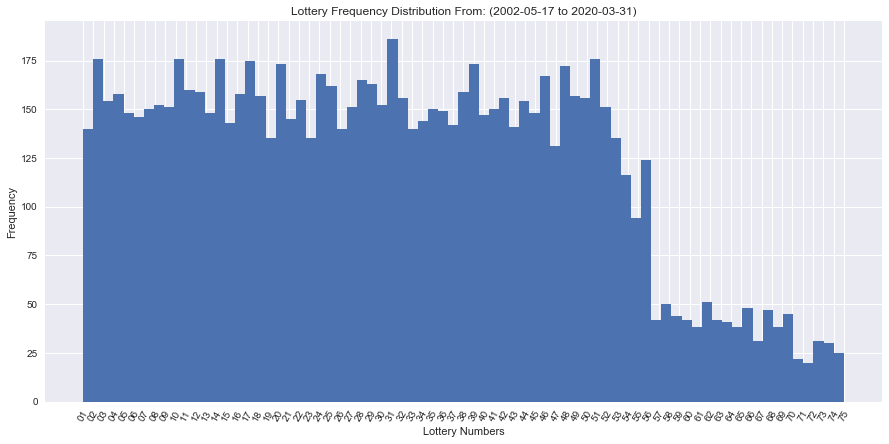

In [220]:
#plotting the frequency distribution of the lottery numbers 
sort_nums.hist(bins=75, figsize=(15,7), xrot=60)
plt.title('Lottery Frequency Distribution From: (2002-05-17 to 2020-03-31)')
plt.ylabel('Frequency')
plt.xlabel('Lottery Numbers')
plt.savefig('../images/allnumhist.png')
plt.show()

### Given that all numbers should be equally likely to be picked, we should expect a uniform distribution, which it is fairly consistent to what is shown.  Since numbers were added after at different time periods it is okay to see numbers greater than 70 show up less. 

In [106]:
nums_less_52 = [x for x in nums if x < '53']
nums_less_52.sort()

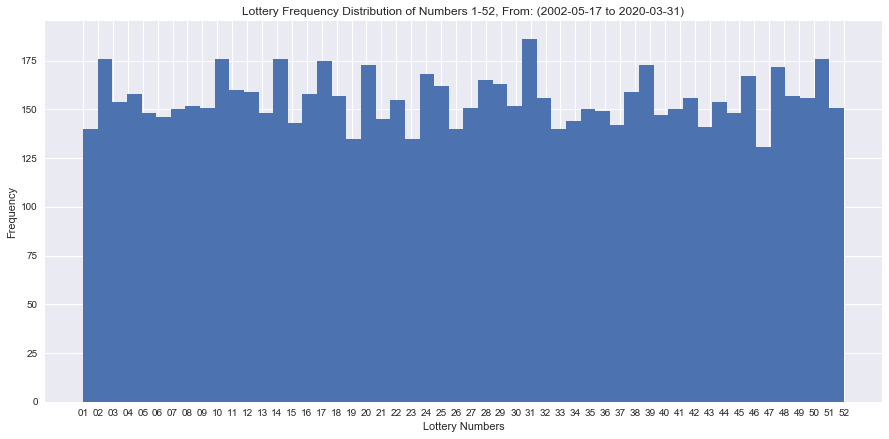

In [219]:
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(nums_less_52, bins=52)
plt.title('Lottery Frequency Distribution of Numbers 1-52, From: (2002-05-17 to 2020-03-31)')
plt.ylabel('Frequency')
plt.xlabel('Lottery Numbers')
plt.savefig('../images/fiftynumhist.png')
plt.show()

In [108]:
#import stats library
import scipy.stats as stats

# Hypothesis Testing

##### Though visually the numbers do seem to have a uniform distribution, we have statistics to provide more clarity and decisive thresholds.

For this I will take only the drawings from October 28, 2017 onwards.  Since that is the current lottery makeup of numbers.

The underlying assumption of the mega millions lottery is that any number has the same probability of being selected.  Giving that fact we can leverage the power of chi-square test goodness of fit test.

<img src='../images/chisq.gif'>

In [109]:
test_df = df[df['Draw Date']>='2017-10-28']

In [110]:
test_nums = pd.concat([test_df['first'], test_df['second'], test_df['third'], test_df['fourth'], test_df['fifth']], axis=0)
val_sorted = test_nums.sort_values()

In [111]:
test_num_df = pd.DataFrame(test_nums.value_counts()).reset_index()
test_num_df.columns=['number', 'counts']
test_num_df.sort_values(by='number', inplace=True)

### Model Notation

The number of balls chosen at each draw is n=5 (excluding the gold Mega Ball), the total number of balls is N=70.<br>Therefore; p = n/N = 5/70 chance of selection
<br>Number of trails: 244
<br>The expected frequency is: 17.43

In [117]:
num_of_trails = len(test_df)
p = 5/70
exp = num_of_trails*p

In [118]:
test_num_df['expected']= exp

In [119]:
print("Number of trails: {}\nExpected Frequency: {:.2f}".format(num_of_trails, exp))

Number of trails: 244
Expected Frequency: 17.43


<strong>Null Hypothesis</strong><br>
Ho: The numbers occur with equal frequencies, they fit a uniform distribution<br><br>
<strong>Alternative Hypothesis</strong><br>
H1: The numbers occur with unequal frequencies, they do not fit a uniform distribution<br><br>
<strong>Test Statistic</strong><br>
Chi-Square Goodness of Fit Test<br><br>
<strong>Significance Level</strong><br>
Alpha = 0.05

In [120]:
t, p = stats.chisquare(test_num_df['counts'], test_num_df['expected'], ddof=1)
print('Chi-squared Test Statistic = {} p-value = {}'.format(t, p))

Chi-squared Test Statistic = 81.54098360655739 p-value = 0.12543345009645046


In [121]:
#significance level
alpha = 0.05 

if p <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


Degrees of Freedom (dfs) = 70 - 1 = 69<br>
Confidence level = 95%<br>

Critical Value From Chi-Square Table: 89.391

### Conclusion:

Given that the test statistic rendered 81.54 which is to the left (lower) of the critical value from the Chi-Square table of 89.391 and the p-value was greater than 0.05, There is not sufficient evidence to conclude that the lottery drawings numbers do not occur with equal frequencies. 

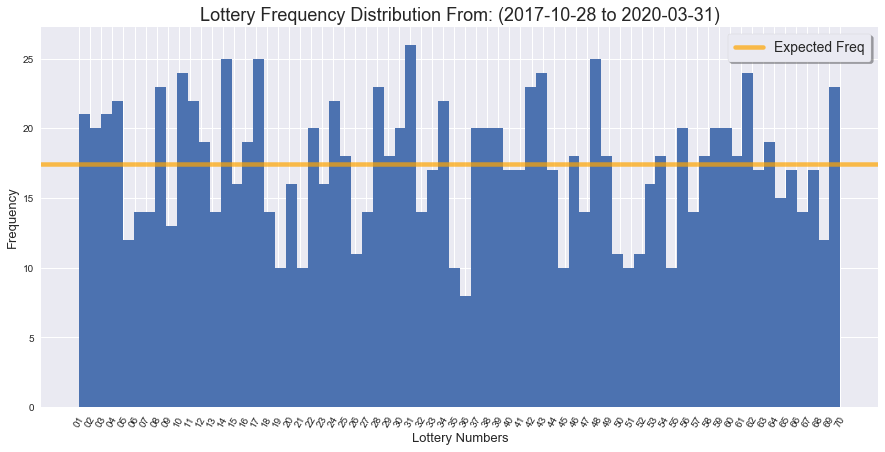

In [221]:
#plotting the frequency distribution of the lottery numbers 
fig, ax = plt.subplots()
val_sorted.hist(bins=70, figsize=(15,7), xrot=60, ax=ax)
plt.title('Lottery Frequency Distribution From: (2017-10-28 to 2020-03-31)', size=18)
plt.ylabel('Frequency', size=13)
plt.xlabel('Lottery Numbers', size=13)
ax.axhline(exp, color='orange', linewidth=4.5, alpha=0.7)
label=['Expected Freq']
ax.legend(label, fancybox=True, shadow=True, borderpad=0.5, frameon=True, fontsize=14)
plt.savefig('../images/newnumhist.png')
plt.show()

In [23]:
import scipy.special as ss

<p>The actual odds of winning are simple to calculate.  Its two nCk combinations.</p>
<TABLE>
   <TR>    
       <TH>Starting Date</TH>
       <TH>Pick 5 White Balls From Field of</TH>
       <TH>Pick 1 Gold (Mega) Ball From Field of</TH>
       <TH>Jackpot odds</TH>
   </TR> 
   <TR>
      <TD>October 28, 2017</TD>
      <TD>70</TD>
      <TD>25</TD>
      <TD>1: 302,575,350</TD>
   </TR>
</TABLE>
<img src="../images/nck.png">

In [24]:
print("Probability of choosing the winning 5 numbers: 1 in {:,.0f}".format(ss.comb(70,5)))
print("Probability of choosing the winning Gold Ball number: 1 in {:,.0f}".format(ss.comb(25,1)))
print("Probability of choosing Jackpot combination: 1 in {:,.0f}".format(ss.comb(70,5) * ss.comb(25,1)))

Probability of choosing the winning 5 numbers: 1 in 12,103,014
Probability of choosing the picking the Gold Ball number: 1 in 25
Probability of choosing Jackpot combination: 1 in 302,575,350


# Lets See How Many People Actually Win

So now that the null hypothesis was failed to be rejected.  Meaning, there is not enough evidence to say that the numbers do not follow uniform distribution (can occur with equal frequencies). And have derived the actual odds of winning the lottery, lets see how many times it has actually happened. 

In [127]:
import requests
from bs4 import BeautifulSoup as bs

In [128]:
#set lottery url to be scraped
url = 'https://www.megamillions.com/Winners-Gallery.aspx'
#get request
response = requests.get(url)
#parse html data
soup = bs(response.text, 'lxml')
pages = soup.select('div.PagerControl')
#get the last page of winners
lst_num =int(pages[0].select('a')[-1:][0]['href'].split('=')[-1])
lst_num

15

In [129]:
names = []

#loop through all pages and get winner information and amount
for x in range(1,lst_num+1):
    w_url = url + '?page=' + str(x)
    response = requests.get(w_url)
    soup = bs(response.text, 'lxml')
    
    name = [x.get_text(strip=True) for x in soup.find_all(class_="winnerListName")]
    location = [x.get_text(strip=True) for x in soup.find_all(class_="winnerListLocation")]
    date = [x.get_text(strip=True) for x in soup.find_all(class_="winnerListDate")]
    amount = [x.get_text(strip=True) for x in soup.find_all(class_="winnerListPrizeAmt")]
    
    data = pd.DataFrame({
        'name':name,
        'location': location,
        'date':date,
        'amount':amount
        })
    names.append(data)

In [398]:
w_df = pd.concat(names)
w_df.head()

,name,location,date,amount
0,Bob Ogrodnik & Bill Schouboe,"Virginia Beach, VA",1/14/2020,$1 Million
1,Just Us,"Eldora, IA",12/17/2019,$1 Million
2,David Burnette,"Newport, NC",12/6/2019,"$50,000"
3,Dave Hodges,"Suffolk, VA",10/29/2019,$1 Million
4,Robert Calfee,"Park City, KY",10/11/2019,$1 Million


In [399]:
#split the location column, into city and state
w_df[['amount', 'unit']] = w_df.loc[:,'amount'].apply(lambda x: pd.Series(str(x).split(' ')))
w_df[['city', 'state']] = w_df.loc[:,'location'].apply(lambda x: pd.Series(str(x).split(',')))
w_df['amount'] = round(pd.to_numeric(w_df.loc[:,'amount'].replace({'\$': '', ',': ''}, regex=True), downcast='float'), 2)
w_df['amount'] = [x*1000000 if len(str(x)) <= 5 else x for x in w_df['amount']]
w_df['unit'] = w_df.loc[:,'unit'].fillna(value='Thousand')
w_df['date'] = pd.to_datetime(w_df['date'])

In [400]:
#minor data manipulation; replace Maryland to MD and Mi to MI (webdata is messy no matter the website)
w_df['state'].replace({'Maryland':'MD', 'Mi':'MI'}, regex=True, inplace=True)

In [401]:
w_df['month'] = w_df['date'].dt.month
w_df['day'] = w_df['date'].dt.day
w_df['year'] = w_df['date'].dt.year
w_df['dayofweek'] = w_df['date'].dt.weekday_name

In [499]:
w_df.head()

,name,location,date,amount,unit,city,state,month,day,year,dayofweek
0,Bob Ogrodnik & Bill Schouboe,"Virginia Beach, VA",2020-01-14,1000000.0,Million,Virginia Beach,VA,1,14,2020,Tuesday
1,Just Us,"Eldora, IA",2019-12-17,1000000.0,Million,Eldora,IA,12,17,2019,Tuesday
2,David Burnette,"Newport, NC",2019-12-06,50000.0,Thousand,Newport,NC,12,6,2019,Friday
3,Dave Hodges,"Suffolk, VA",2019-10-29,1000000.0,Million,Suffolk,VA,10,29,2019,Tuesday
4,Robert Calfee,"Park City, KY",2019-10-11,1000000.0,Million,Park City,KY,10,11,2019,Friday


In [134]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 0
Data columns (total 7 columns):
name        281 non-null object
location    281 non-null object
date        281 non-null datetime64[ns]
amount      281 non-null float64
unit        281 non-null object
city        281 non-null object
state       281 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 17.6+ KB


In [583]:
# dt_df=w_df.set_index('date')
w_df.to_csv('../data/lotto_winners.csv', index=False)

In [503]:
#summary statistics
min_jackpot=40000000
#number of jackpot winners
num_of_jp_winners= w_df[w_df['amount']>=min_jackpot]
#information about the maximum jackpot paid out
max_winner = w_df[w_df['amount']==w_df['amount'].max()]
w_df[w_df['amount']==w_df['amount'].min()]

,name,location,date,amount,unit,city,state,month,day,year,dayofweek
9,Gloria Swanigan,"San Pedro, CA",2015-03-10,1.1,Million,San Pedro,CA,3,10,2015,Tuesday


In [483]:
#grouped data by year
y_data = w_df.groupby('year', as_index=False)['amount'].sum()
y_data['amount'] =y_data['amount'].apply(lambda x: x/1000000)

#grouped data by month
m_data = w_df.groupby('month', as_index=False)['amount'].sum()
m_data['amount'] =m_data['amount'].apply(lambda x: x/1000000)

#grouped data by day
d_data = w_df.groupby('dayofweek')['amount'].sum()

In [581]:
#ealiest winner in the dataframe
From =str(dt_df.index.min())[:10]
#last person to have won
Last_Winner =str(w_df['date'].max())[:10]
#total amount paid out 
Amount =w_df['amount'].sum().round()

In [591]:
print("***************** SUMMARY STATISTICS *****************")
print("                   As of: {}\n".format(From))
print("Total Number of Jackpot Winners: {}".format(len(num_of_jp_winners)))
print("Jackpot Amounts Paid Won: ${:,.0f}".format(num_of_jp_winners['amount'].sum()))
print("The Total Amount Paid Out: ${:,.0f}".format(Amount))
print("Largest Jackpot Awarded: ${:,.0f}".format(int(max_winner['amount'])))
print("Occured On: {}".format(str(max_winner['date'])[4:14]))
print("Last Winner Occured On: {}".format(Last_Winner))

***************** SUMMARY STATISTICS *****************
                   As of: 2012-03-30

Total Number of Jackpot Winners: 34
Jackpot Amounts Paid Won: $6,885,000,000
The Total Amount Paid Out: $7,389,710,990
Largest Jackpot Awarded: $536,000,000
Occured On: 2016-07-08
Last Winner Occured On: 2020-01-14


In [584]:
max_winner

,name,location,date,amount,unit,city,state,month,day,year,dayofweek
7,"Warren D, LLC","Cambridge City, IN",2016-07-08,536000000.0,Million,Cambridge City,IN,7,8,2016,Friday


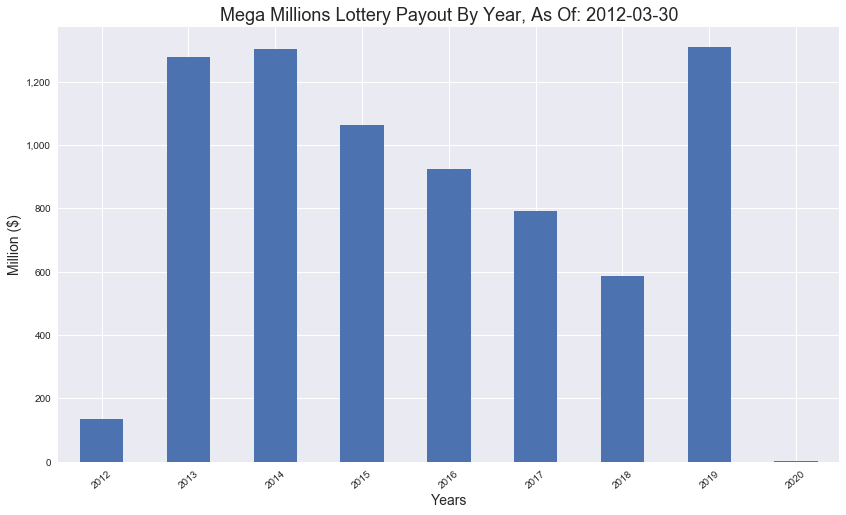

In [497]:
fig, ax =plt.subplots(figsize=(14,8))
#filter data
datay = w_df.groupby('year')['amount'].sum()
#convert amount by dividing by 1 million
datay.apply(lambda x: x/1000000).plot(kind='bar', ax=ax, rot=40)
#format y axis label
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#set title
ax.set_title('Mega Millions Lottery Payout By Year, As Of: {}'.format(From), size=18)
#set ylabel
ax.set_ylabel('Million ($)', size=14)
#set xlabel
ax.set_xlabel('Years', size=14)
#save image to images folder
plt.savefig('../images/mm_payout.png')
plt.show()

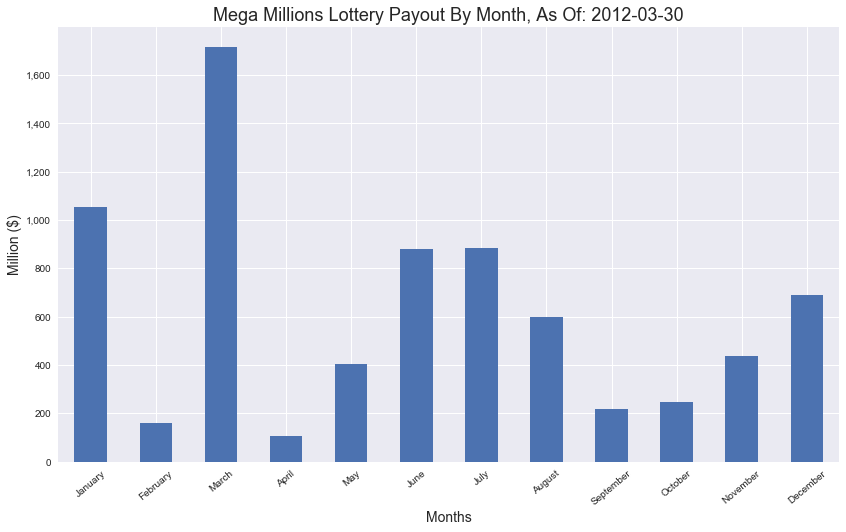

In [493]:
fig, ax= plt.subplots()
#filtered data
m_data['amount'].plot(kind='bar', rot=40, ax=ax, figsize=(14,8))
#assign month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
plt.xticks(range(12), months)
#format y axis label
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#set title
ax.set_title('Mega Millions Lottery Payout By Month, As Of: {}'.format(From), size=18)
#set ylabel
ax.set_ylabel('Million ($)', size=14)
#set xlabel
ax.set_xlabel('Months', size=14)
#save image to images folder
plt.savefig('../images/mm_monthly_payout.png')
plt.show()

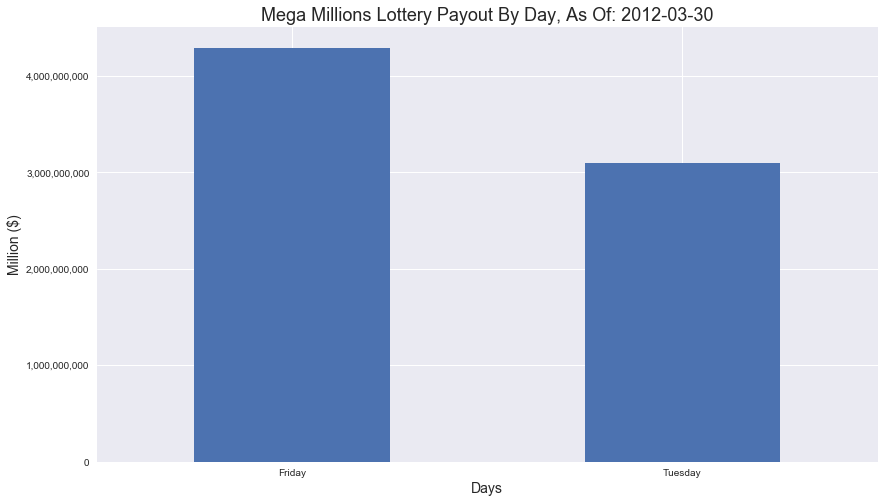

In [592]:
fig, ax= plt.subplots()
#filtered data
d_data.plot(kind='bar', rot=0, ax=ax, figsize=(14,8))
#format y axis label
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#set title
ax.set_title('Mega Millions Lottery Payout By Day, As Of: {}'.format(From), size=18)
#set ylabel
ax.set_ylabel('Million ($)', size=14)
#set xlabel
ax.set_xlabel('Days', size=14)
#save image to images folder
plt.savefig('../images/mm_day_payout.png')
plt.show()